# Classification

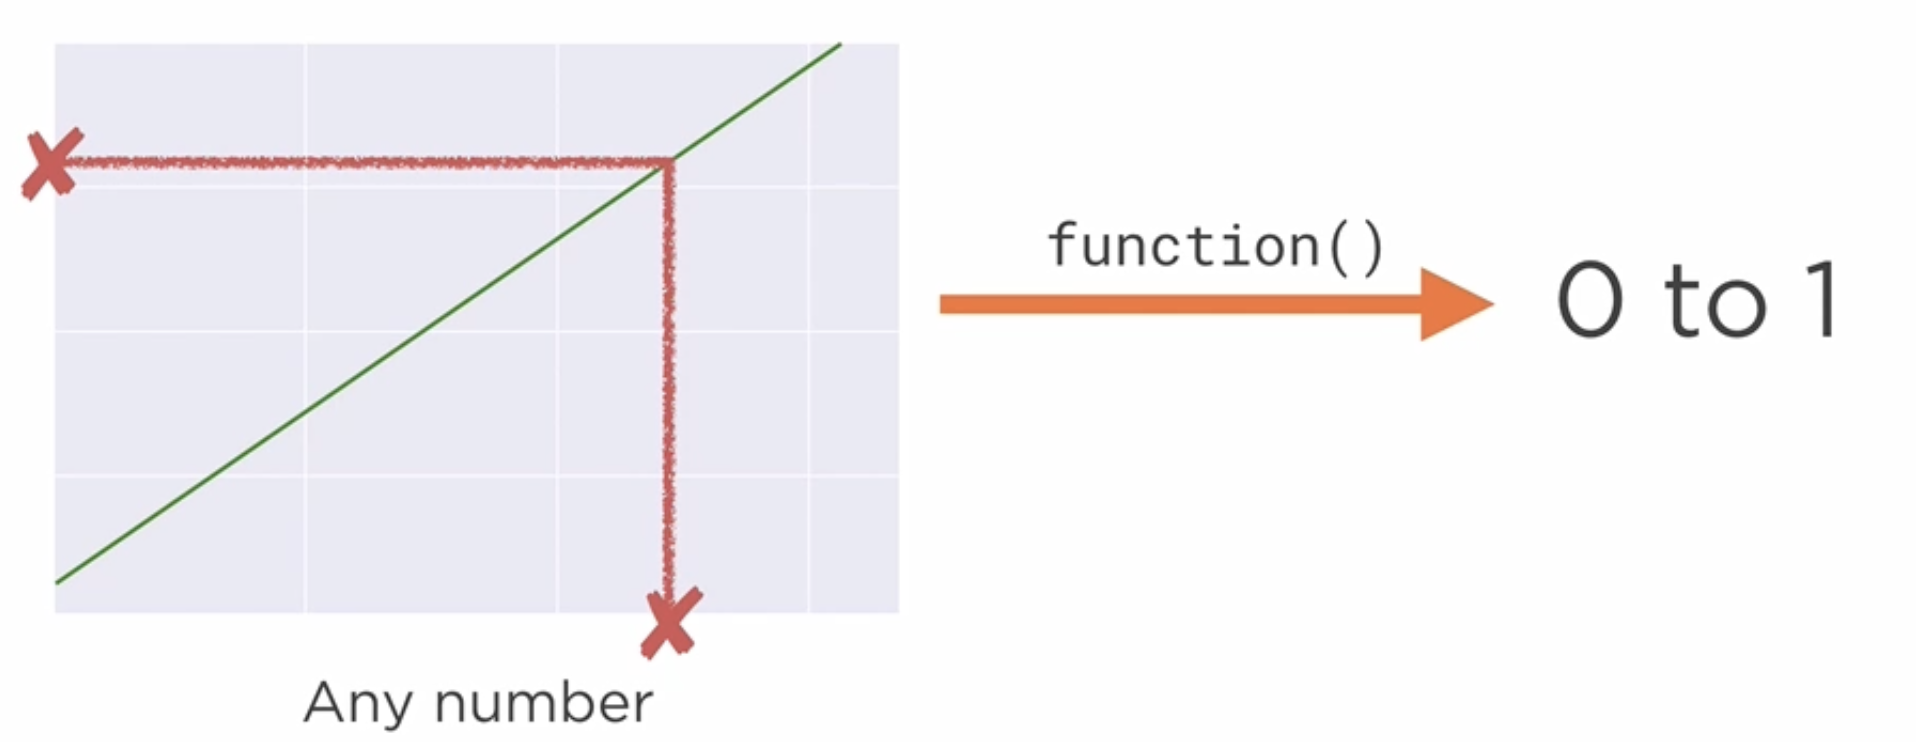

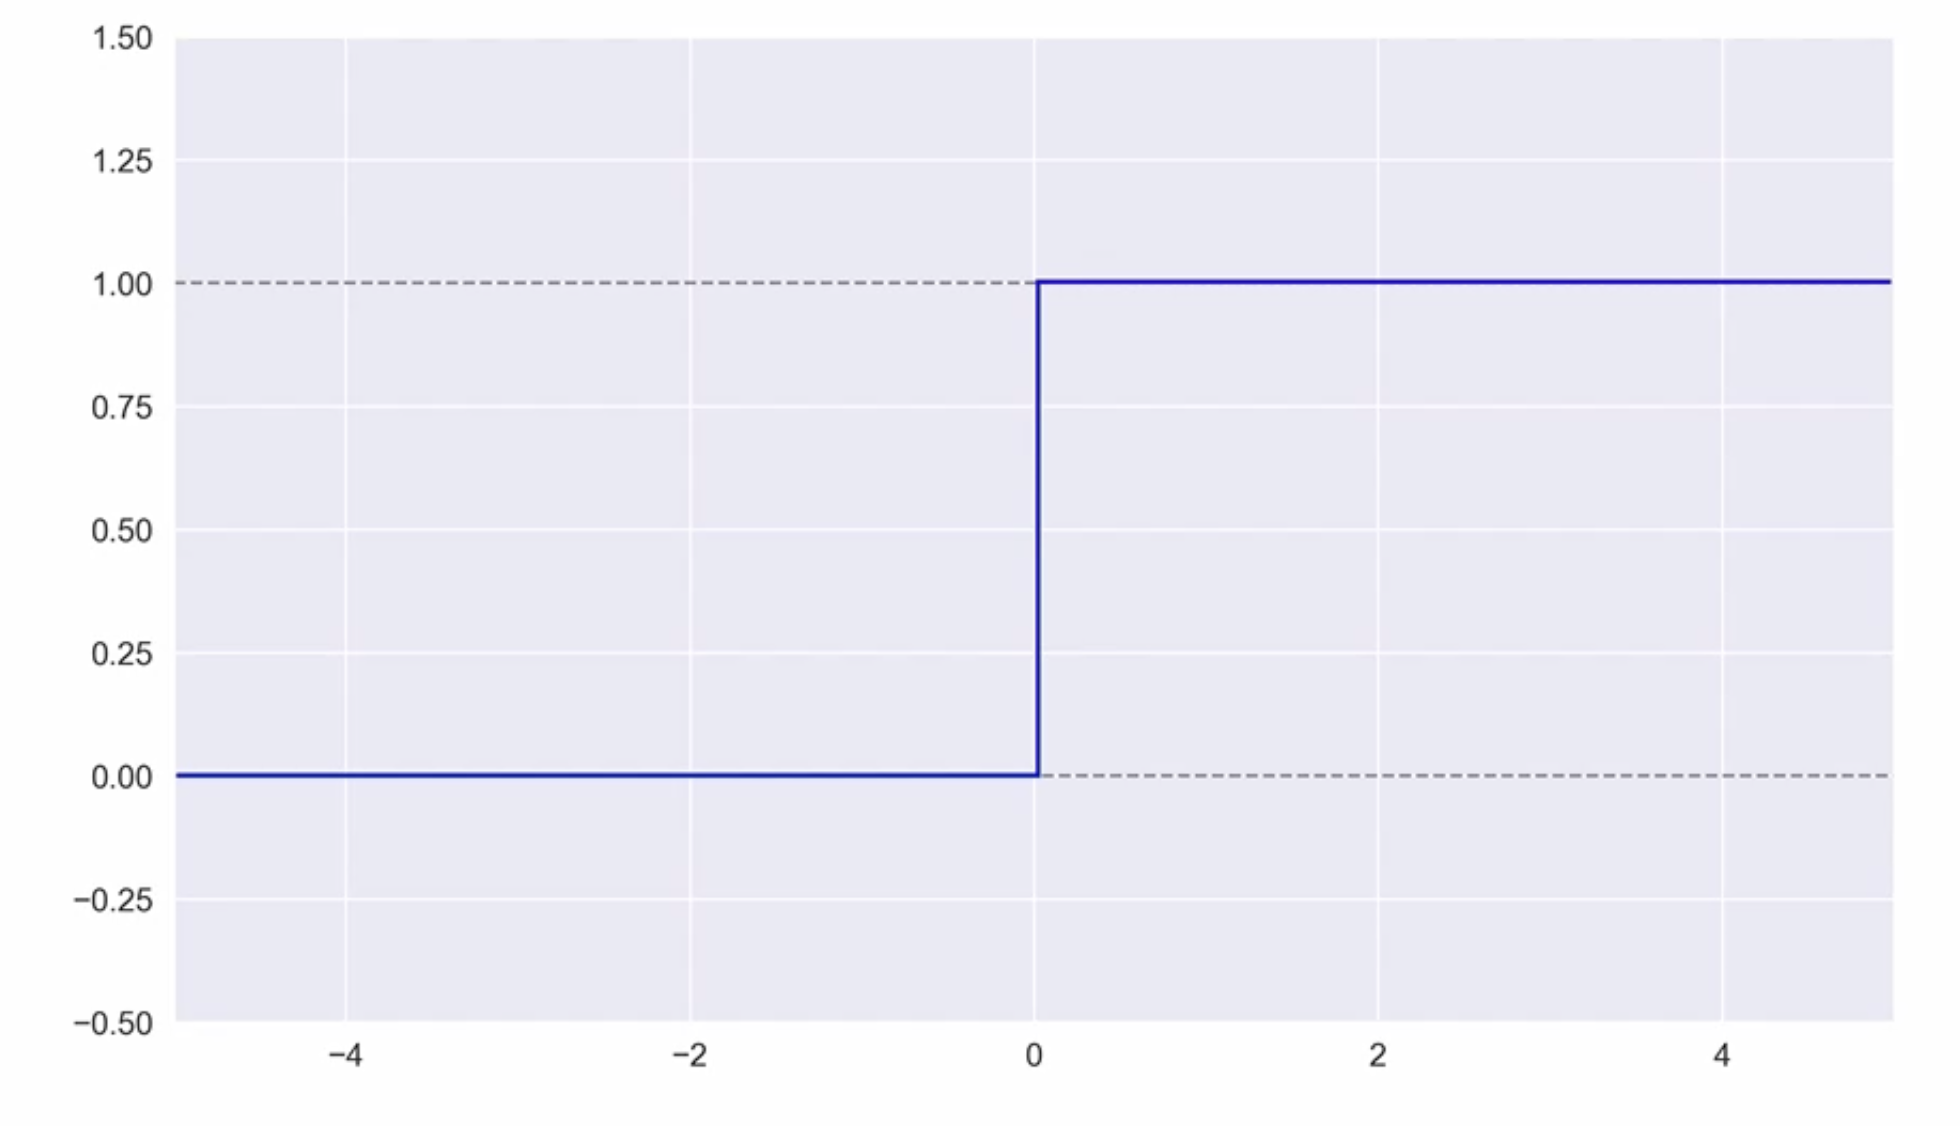

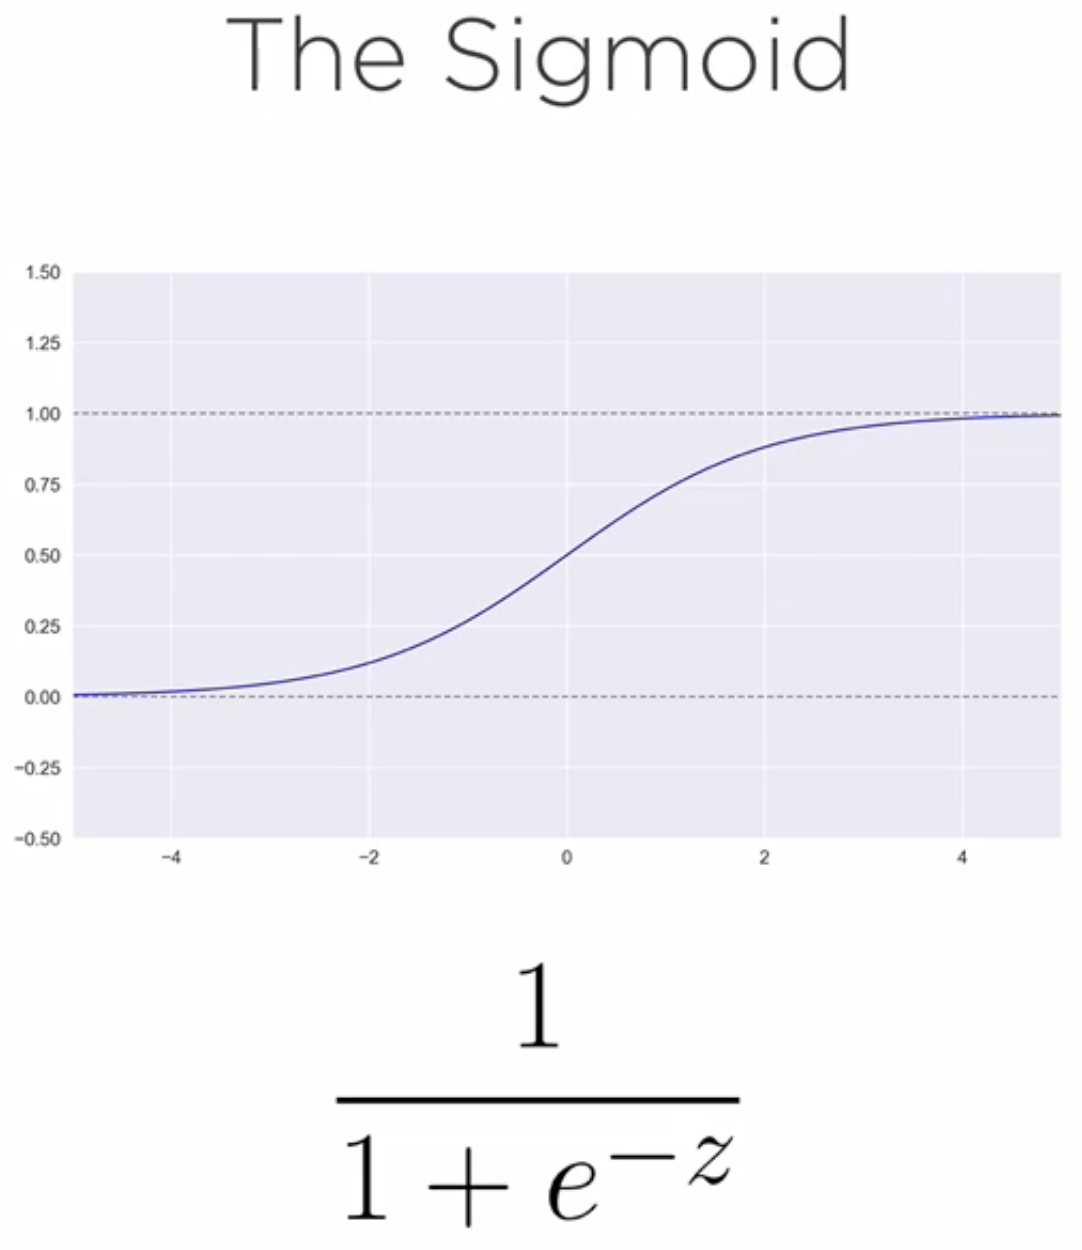

In [1]:
import numpy as np
x1, x2, x3, y = np.loadtxt("pizza_categorical.txt", skiprows=1, unpack=True)
X = np.column_stack((np.ones(x1.size), x1, x2, x3))
Y = y.reshape(-1, 1)

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [3]:
def predict(X, w):
    #output is wrapped around sigmoid 
    return sigmoid(np.matmul(X, w))

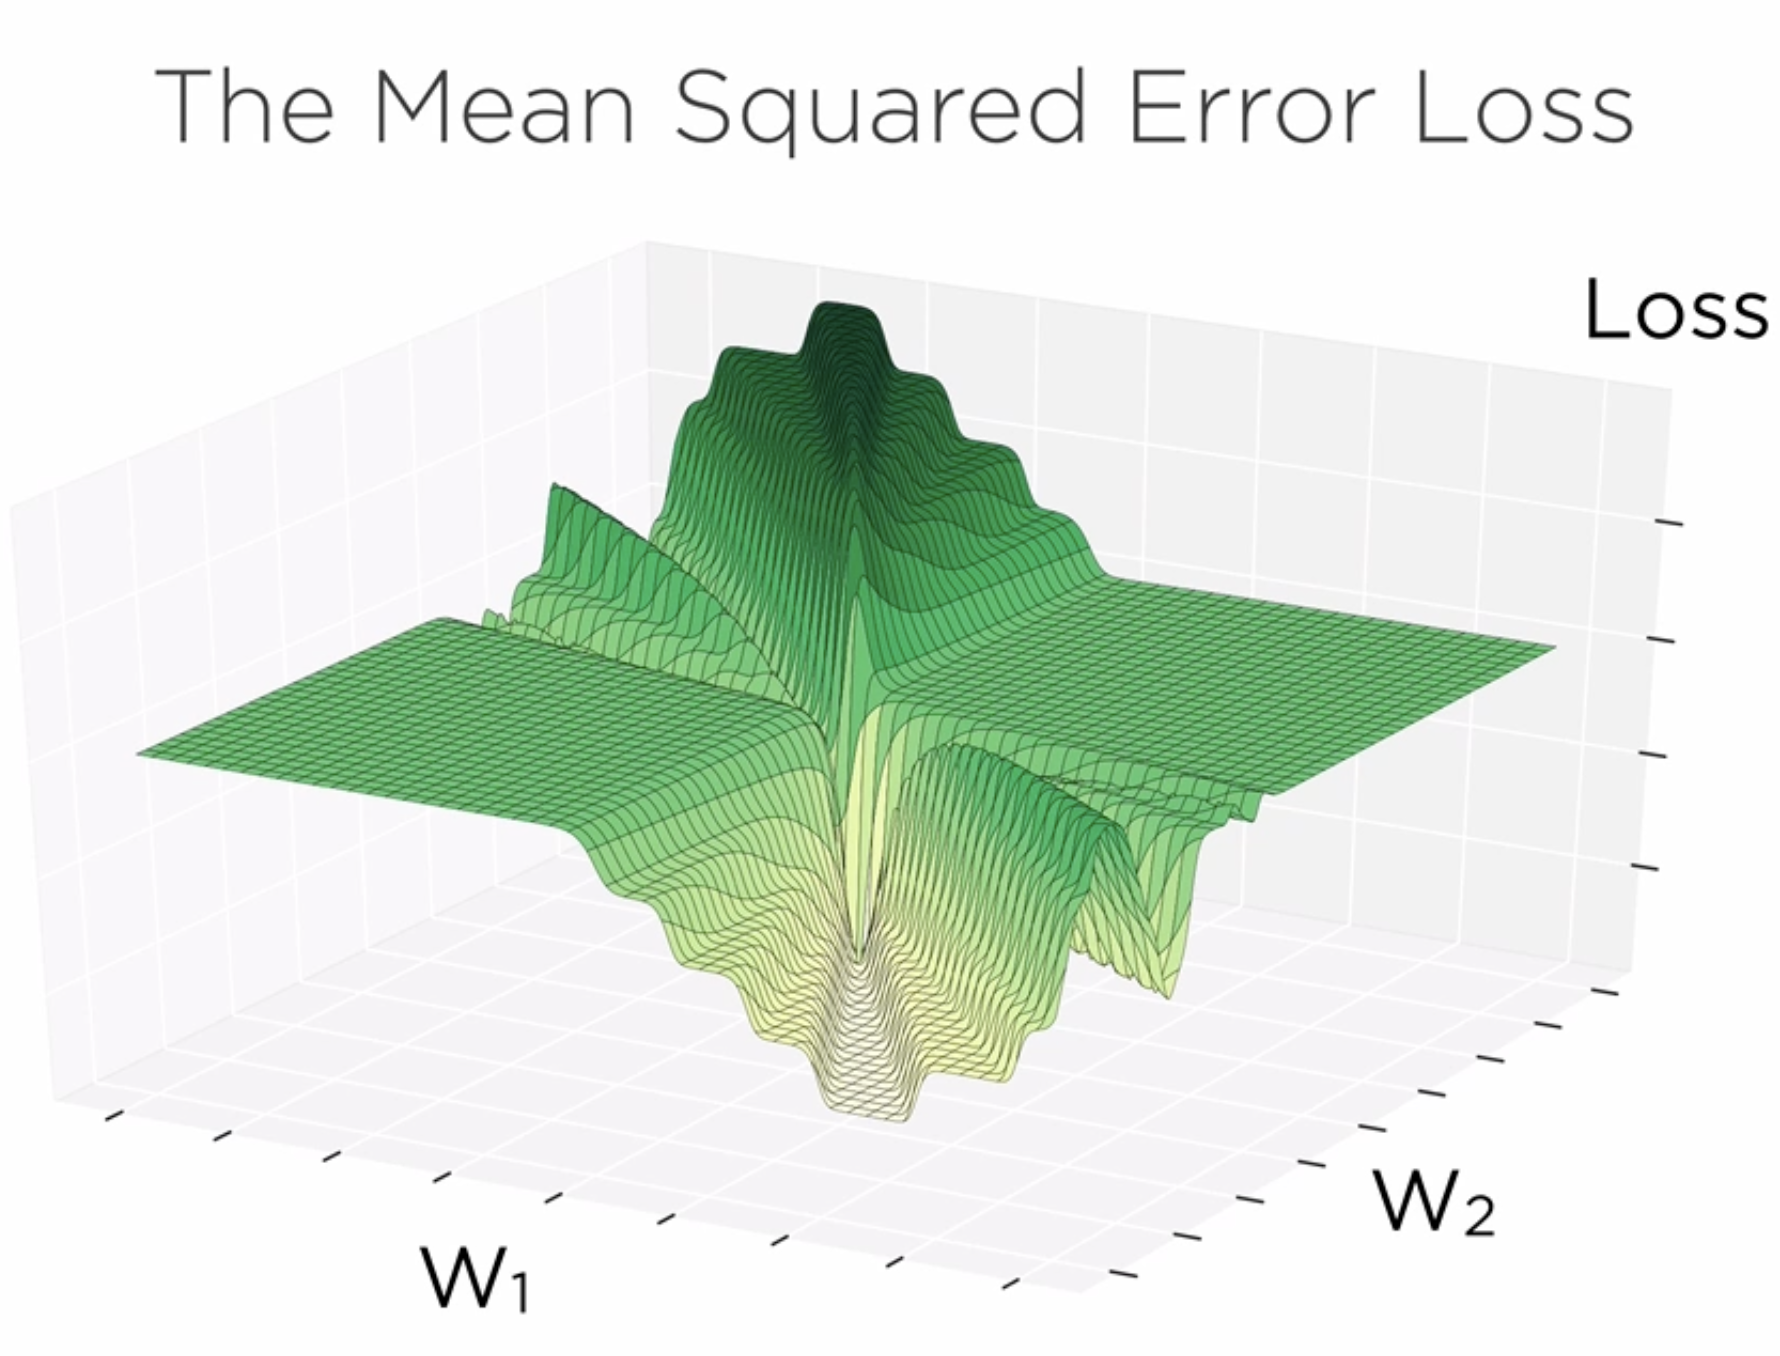

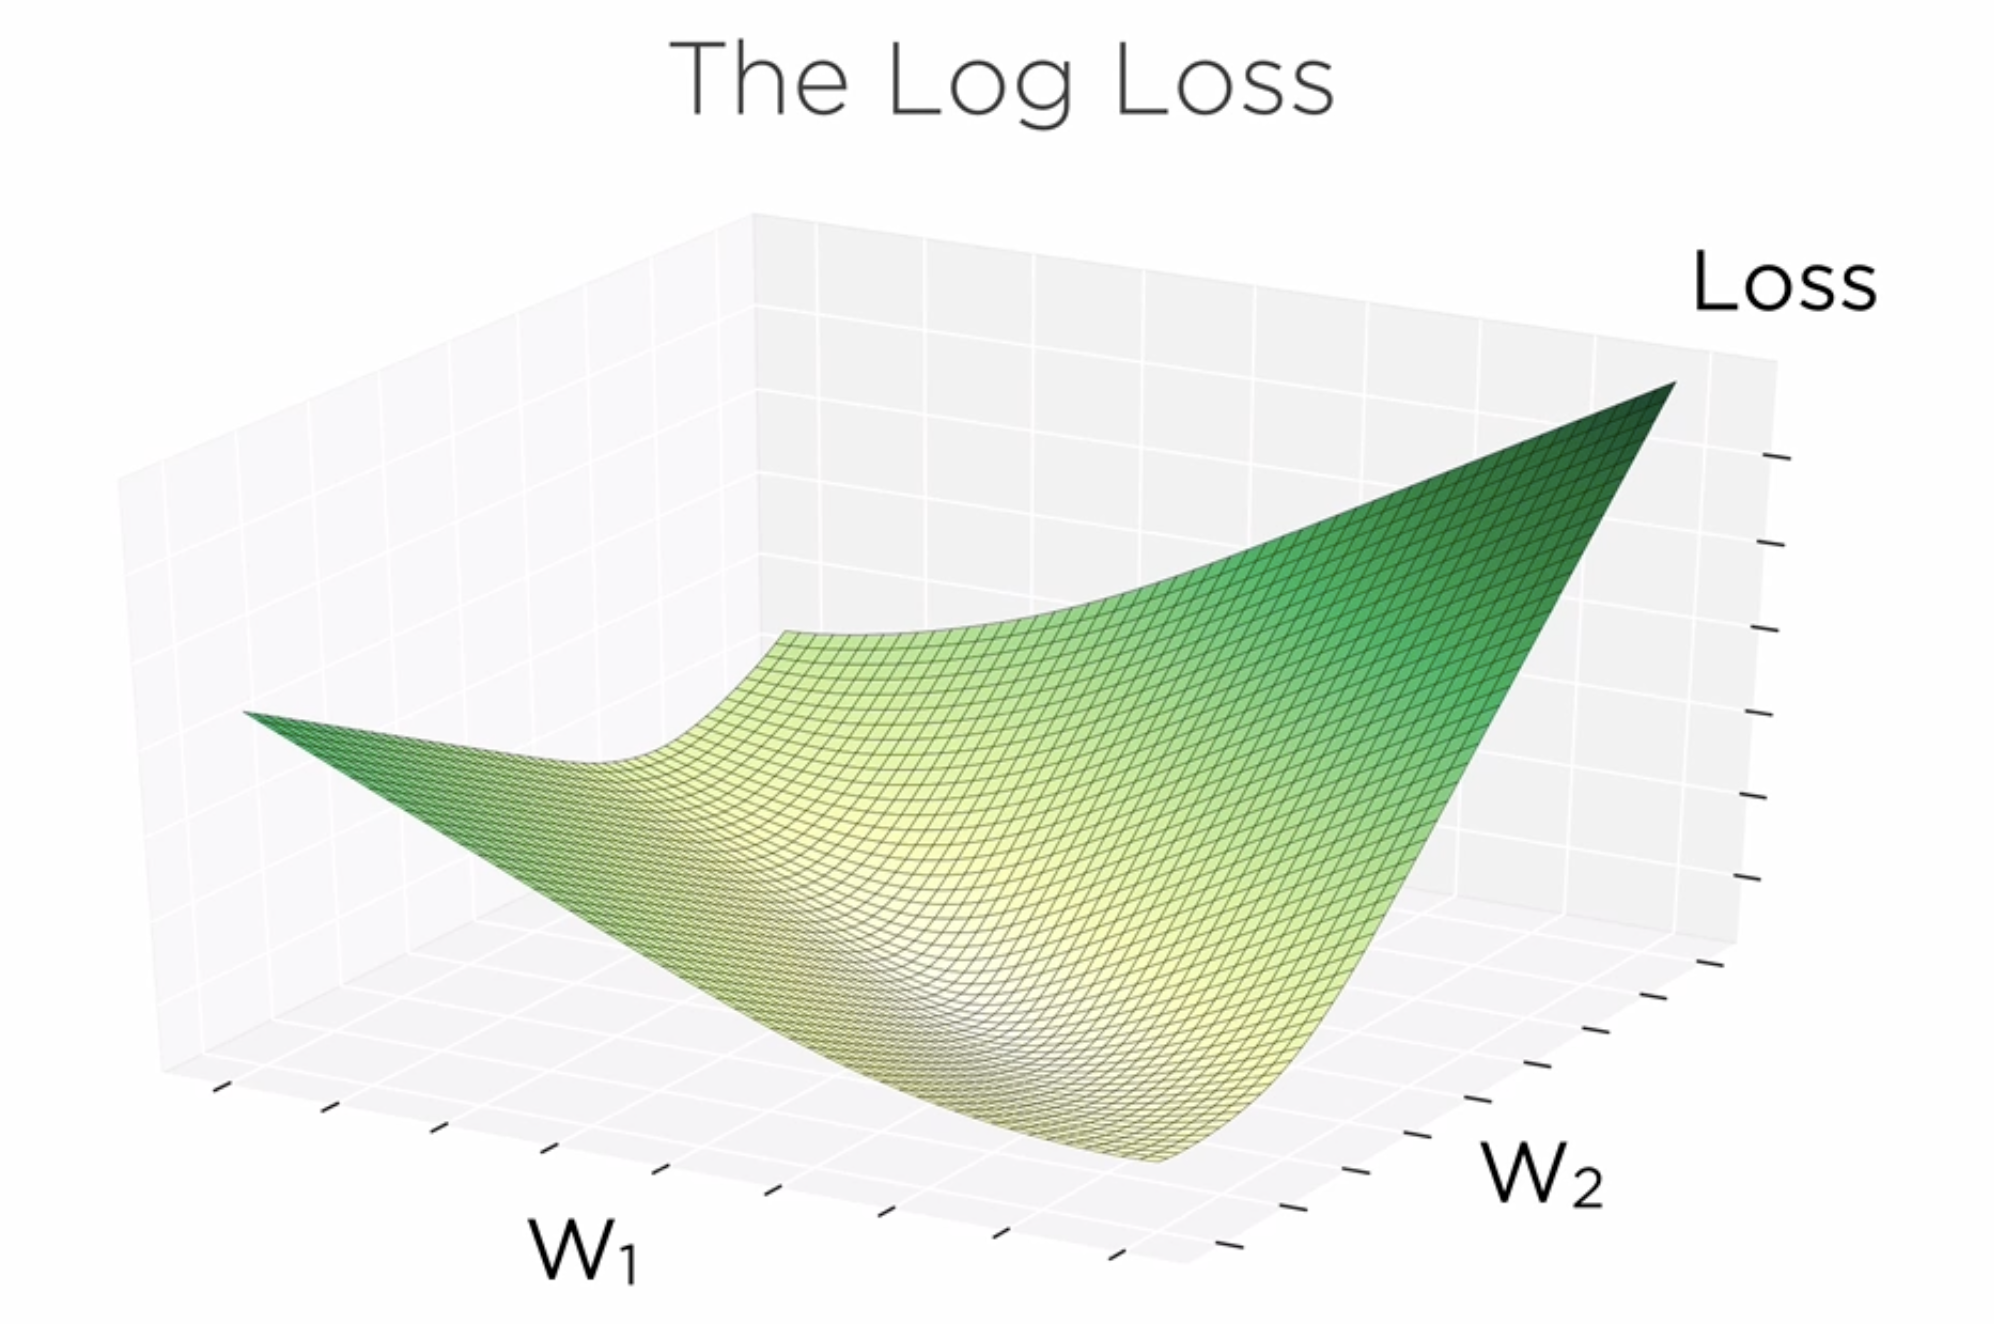

In [6]:
#we introduced the sigmoid, we tried to make it smooth and nice, but once we calculate its loss we still end up with a surface that's not gradient descent friendly. 
#So, we need another way to calculate the loss, one that gives us a smooth, gentle surface.
#log (logarithmic) loss

def loss(X, Y, w):
    predictions = predict(X, w)
    first_term = Y * np.log(predictions) #if Y == 0 dissappears
    second_term = (1 - Y) * np.log(1 - predictions) #if Y == 1 dissappears
    return -np.average(first_term + second_term)

In [5]:
#only difference is that in the log loss we don't have  multiplication by 2 (from textbooks)
def gradient(X, Y, w):
    return np.matmul(X.T, (predict(X, w) - Y)) / X.shape[0]

In [7]:
def train(X, Y, iterations, lr):
    w = np.zeros((X.shape[1], 1))
    for i in range(iterations):
        print("Iteration %4d => Loss: %.20f" % (i, loss(X, Y, w)))
        w -= gradient(X, Y, w) * lr
    return w